In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' % x)

## 1. read in data

In [2]:
cardio_data = pd.read_csv('cardio_train.csv', delimiter = ";", index_col = "id")

In [3]:
cardio_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.00000,110,80,1,1,0,0,1,0
1,20228,1,156,85.00000,140,90,3,1,0,0,1,1
2,18857,1,165,64.00000,130,70,3,1,0,0,0,1
3,17623,2,169,82.00000,150,100,1,1,0,0,1,1
4,17474,1,156,56.00000,100,60,1,1,0,0,0,0


## 2. data exploration

In [4]:
cardio_data.info()
## initially, there is no missing values for this dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [5]:
cardio_data.age.nunique()
## age is a in an uncommon format, which represent the days of age. 
## it might need to be transformed to years later for easy understanding.

8076

In [6]:
cardio_data.shape

(70000, 12)

In [7]:
## adding age_year variable to show the age in years
cardio_data['age_year'] = cardio_data.age // 365

In [8]:
## exam the unique values for each variables.
N_unique=[]
unique_list=[]
for i in cardio_data.columns:
    temp = cardio_data[i].nunique()
    N_unique.append(temp)
    unique_list.append(cardio_data[i].unique())

In [9]:
N_unique

[8076, 2, 109, 287, 153, 157, 3, 3, 2, 2, 2, 2, 28]

In [10]:
## show the unique values for each variable
feature_df = pd.DataFrame(zip(cardio_data.columns, N_unique, unique_list))
feature_df

,0,1,2
0,age,8076,"[18393, 20228, 18857, 17623, 17474, 21914, 221..."
1,gender,2,"[2, 1]"
2,height,109,"[168, 156, 165, 169, 151, 157, 178, 158, 164, ..."
3,weight,287,"[62.0, 85.0, 64.0, 82.0, 56.0, 67.0, 93.0, 95...."
4,ap_hi,153,"[110, 140, 130, 150, 100, 120, 145, 170, 135, ..."
5,ap_lo,157,"[80, 90, 70, 100, 60, 85, 89, 110, 65, 63, 79,..."
6,cholesterol,3,"[1, 3, 2]"
7,gluc,3,"[1, 2, 3]"
8,smoke,2,"[0, 1]"
9,alco,2,"[0, 1]"


In [11]:
## the label of this dataset is cardio which means whether the person has cardiovascular disease. 
## the label is pretty much balanced.
cardio_data.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

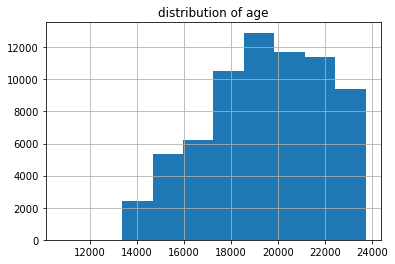

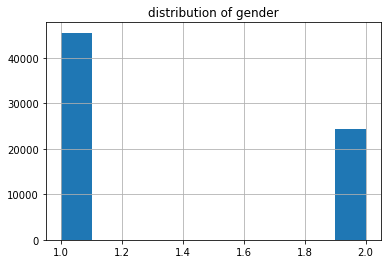

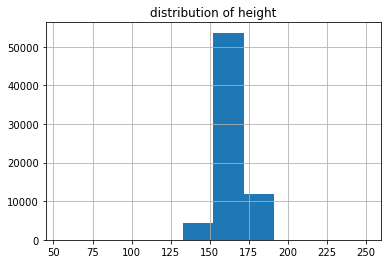

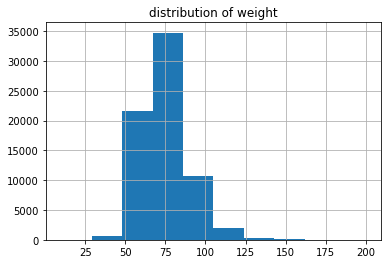

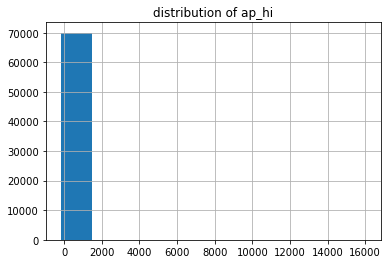

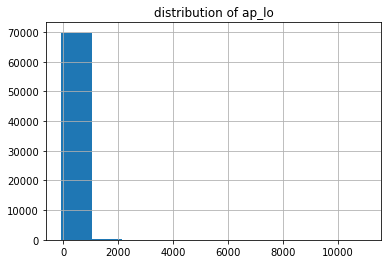

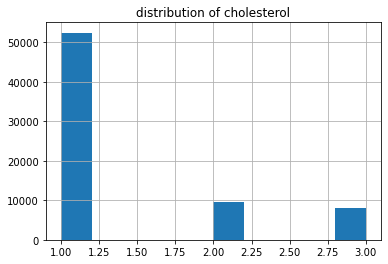

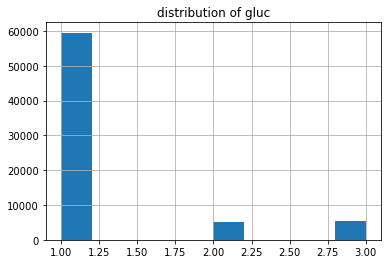

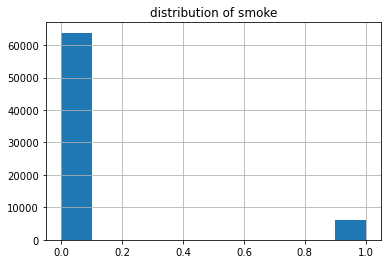

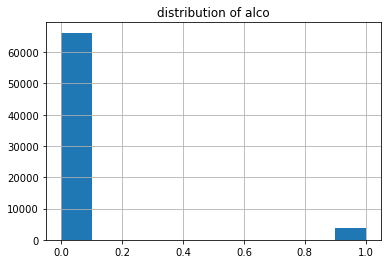

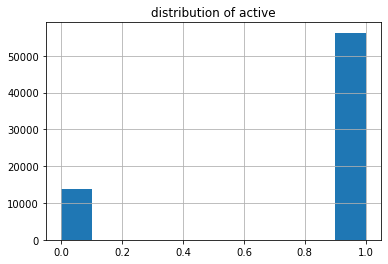

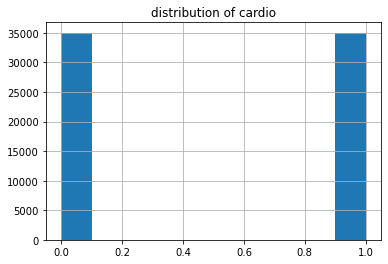

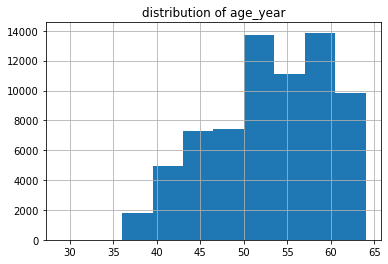

In [12]:
## look at the distribution of each variables.
for i in cardio_data.columns:
    cardio_data[i].hist()
    plt.title("distribution of "+i)
    plt.show()

In [13]:
## some of the data looks out of range.
cardio_data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,70000.00000,70000.00000,70000.00000,70000.00000,70000.00000,70000.00000,70000.00000,70000.00000,70000.00000,70000.00000,70000.00000,70000.00000,70000.00000
mean,19468.86581,1.34957,164.35923,74.20569,128.81729,96.63041,1.36687,1.22646,0.08813,0.05377,0.80373,0.49970,52.84067
std,2467.25167,0.47684,8.21013,14.39576,154.01142,188.47253,0.68025,0.57227,0.28348,0.22557,0.39718,0.50000,6.76677
min,10798.00000,1.00000,55.00000,10.00000,-150.00000,-70.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,29.00000
25%,17664.00000,1.00000,159.00000,65.00000,120.00000,80.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,48.00000
50%,19703.00000,1.00000,165.00000,72.00000,120.00000,80.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,53.00000
75%,21327.00000,2.00000,170.00000,82.00000,140.00000,90.00000,2.00000,1.00000,0.00000,0.00000,1.00000,1.00000,58.00000
max,23713.00000,2.00000,250.00000,200.00000,16020.00000,11000.00000,3.00000,3.00000,1.00000,1.00000,1.00000,1.00000,64.00000


In [14]:
## gender is binary but the values is 1 and 2, swap 2 with 0 for starndard binary representation
cardio_data.gender.replace(to_replace=2, value =0, inplace=True)

Text(0.5, 1.0, 'scatterplot of weight vs height')

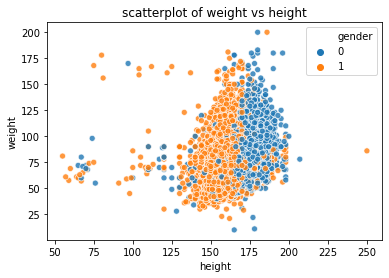

In [15]:
## scatterplot of height and weight to visualize potential out of range values.
sns.scatterplot(x= cardio_data.height, y = cardio_data.weight, hue = cardio_data.gender, alpha =0.8)
plt.title("scatterplot of weight vs height")

### First exam the height. there are small clusters of short people. But there are people with medical conditions which resulting in short statues. By definition, dwarfism is considered for people less than 147cm.[1] I think we should not exclude these data because the heights are uncommon. Also, there is one data which is very tall at 250cm, it seems possible because there are several record of human with similar heights. However, this record is female, there is no female ever in record with this height.[2] We should exclude this datapoint.

In [16]:
## drop the data with height 250cm
cardio_data = cardio_data[cardio_data.height!=250].copy()

In [17]:
cardio_data.shape

(69999, 13)

## reference:
## [1] https://en.wikipedia.org/wiki/Dwarfism
## [2] https://en.wikipedia.org/wiki/List_of_tallest_people